In [1]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt

In [2]:
csv_in = path.join('..', 'data', 'healthcare-dataset-stroke-data-cleanbmi.csv')
df_in = pd.read_csv(csv_in)
df_in.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
1,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
2,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
3,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1
4,81.0,0,0,Yes,Private,186.21,29.0,formerly smoked,1


### BMI-Median

In [3]:
df_in['bmi'].median()

29.1

### Histogram

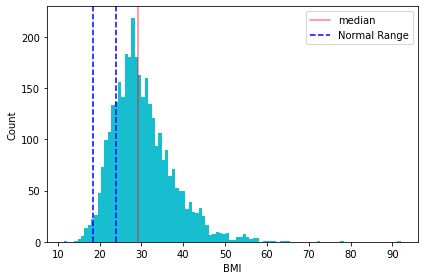

In [13]:
fig, ax = plt.subplots(facecolor="white")

ax.hist(df_in['bmi'], bins=100, color="tab:cyan")
ax.axvline(29.1, color="red", alpha=0.5, label="median")
ax.axvline(18.5, color="blue", linestyle="--", label="Normal Range")
ax.axvline(24, color="blue", linestyle="--")
ax.legend()

ax.set_xlabel("BMI")
ax.set_ylabel("Count")

plt.tight_layout()
#plt.savefig("bmi_reference_lines_test.png", dpi=200, transparent=False)
plt.show()

In [4]:
df_unknown.shape

(1544, 12)

In [9]:
# Filter Unknown
mask = df_in["smoking_status"] != "Unknown"
df_smoke_non_smoke = df_in[mask]
df_smoke_non_smoke.shape
#df_in["smoking_status"]

(3566, 12)

In [9]:
# smoke and stroke
mask1 = df_smoke_non_smoke["smoking_status"] == "never smoked"
df1 = df_smoke_non_smoke[mask1]
mask2 = df1["stroke"] == 1
df2 = df1[mask2]

In [10]:
df2.shape

(90, 12)

In [11]:
# smoke and stroke
mask1 = df_smoke_non_smoke["smoking_status"] == "never smoked"
df1 = df_smoke_non_smoke[mask1]
mask2 = df1["stroke"] == 0
df2 = df1[mask2]
df2.shape

(1802, 12)

In [13]:
# smoke and stroke
mask1 = df_smoke_non_smoke["smoking_status"] != "never smoked"
df1 = df_smoke_non_smoke[mask1]
mask2 = df1["stroke"] == 0
df2 = df1[mask2]
df2.shape

(1562, 12)

### Age vs Smokes

In [18]:
mask = df_smoke_non_smoke["stroke"] == 1
df_smoke_non_smoke_stroke = df_smoke_non_smoke[mask]

In [19]:
xarray = df_smoke_non_smoke_stroke['age']
yarray = df_smoke_non_smoke_stroke['smoking_status'].map({'never smoked': 0, 'smokes': 1, 'formerly smoked': 2})

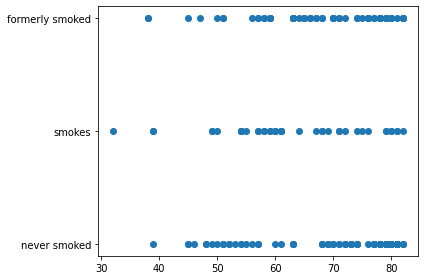

In [20]:
fig, ax = plt.subplots()

ax.scatter(xarray, yarray)
ax.set_yticks([0,1,2])
ax.set_yticklabels(['never smoked', 'smokes', 'formerly smoked'])

plt.tight_layout()
#plt.savefig()
plt.show()